## The Boston Housing Dataset
We will take the Housing dataset which contains information about different houses in Boston. We can access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. First, we will import the required libraries and download the dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
boston_dataset = load_boston()

We print the value of the boston_dataset to understand what it contains. 

print(boston_dataset.keys())

* data: contains the information for various houses

* target: prices of the house

* feature_names: names of the features

* DESCR: describes the dataset

Look at the Description of the dataset to see what it contains

In [2]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The prices of the house indicated by the variable **MEDV** is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

Now load the data into a pandas dataframe and print the first five rows

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Note that the target value **MEDV** is missing from the data. Create a new column of target values and add it to the dataframe.

In [4]:
boston['MEDV'] = boston_dataset.target

### Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. Count the number of missing values for each feature using ```isnull()```

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable **MEDV**. You may plot it with different libraries, try using seaborn for a nicer plot. What distribution follows the data? Can you detect any outliers? 

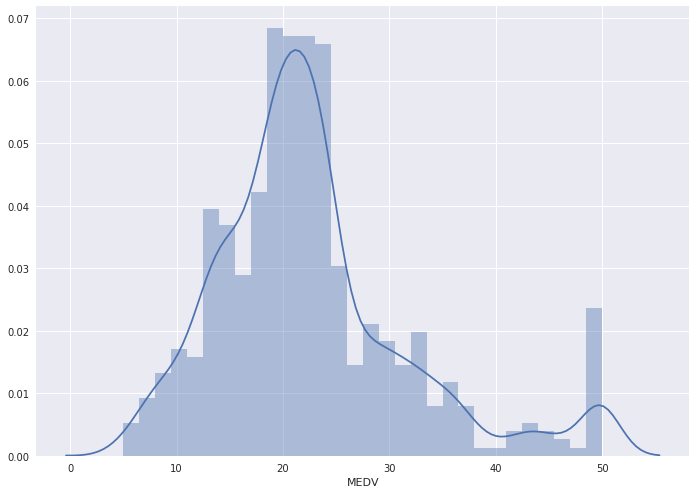

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

Next, we create a correlation matrix that measures the linear relationships between the variables. You may compute the correlation matrix using the ```corr``` function from the ```pandas dataframe``` library. Use the ```heatmap``` function from the ```seaborn``` library to plot the correlation matrix. Find the way to display the correlation numbers on each cell. What does a correlation of 1 mean, and a correlation of -1, and 0?. What properties does the correlation matrix have? Explain the diagonal.

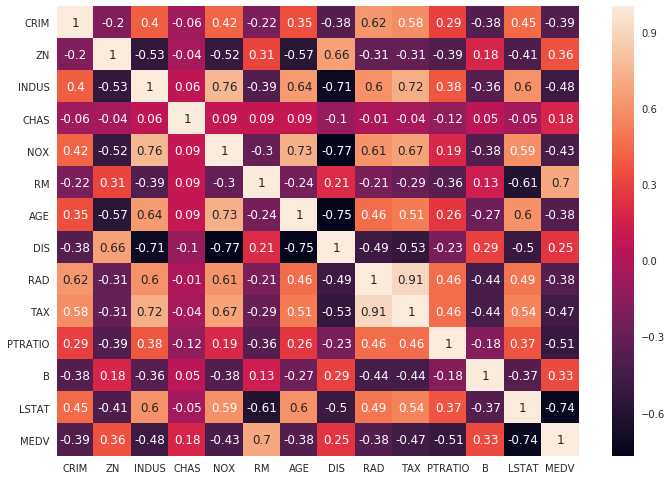

In [7]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Manual feature selection

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix which are the variables with strongest correlation to MEDV?

### Multi-co-linearity

An important point in selecting features for a linear regression model is to check for multi-co-linearity. That is, we should not select feature pairs which are strongly correlated to each other. Let us see simple case with two (independent) variables to see why:

Consider the simplest case where $Y$ is regressed against $X$ and $Z$ and where $X$ and $Z$ are highly positively correlated. Then the effect of $X$ on $Y$ is hard to distinguish from the effect of $Z$ on $Y$ because any increase in $X$ tends to be associated with an increase in $Z$.

Another way to look at this is to consider the equation. If we write 

$$Y=b_0+b_1X+b_2Z+\epsilon,$$

then the coefficient $b_1$ is the increase in $Y$ for every unit increase in $X$ while holding $Z$ constant. But in practice, it is often impossible to hold $Z$ constant and the positive correlation between $X$ and $Z$ mean that a unit increase in $X$ is usually accompanied by some increase in $Z$ at the same time.

Which features have strong correlation?

Finally, suggest two features to use for the regression. Use a scatter plot to see how these features vary with MEDV. Plot them using ```plt.subplot()``` and put the axis titles for each subplot.

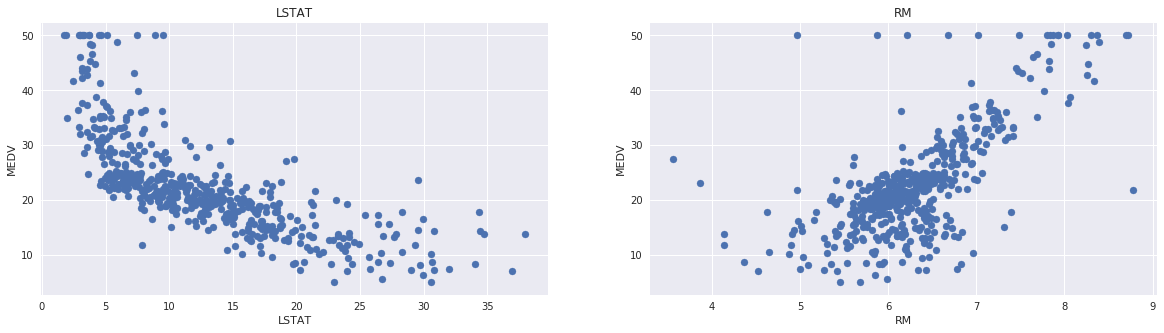

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

What is the relationship between MDEV and LSTAT or RM? Does that make common sense given their descriptions? Can you detect any peculiarities in the data?

### Preparing the data for training
Concatenate the LSTAT and RM columns using ```np.c_``` provided by the numpy library.

In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model
Use again ```scikit-learn``` to train a linear regression model on the training set.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model evaluation
Now evaluate the model using RMSE and R2-score.

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


Is this an expected result considering the scatter plots we saw before? How do you think we may improve the results?